In [1]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

## IMPORTING

In [2]:
img = cv2.imread("CobotAR.jpg") #import an image
imgResize = cv2.resize(img,(1000,500))
kernel = np.ones((5,5), np.uint8)

In [ ]:
cv2.imshow("Output", imgResize)
cv2.waitKey(1000)

In [ ]:
cap = cv2.VideoCapture("Executing2-50.mp4") #import video

In [ ]:
while True:
    success, img = cap.read()
    cv2.imshow("Video",img)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        

In [2]:
webcam = cv2.VideoCapture(0) #import webcam
webcam.set(3,640) #dimensions
webcam.set(4,480) #dimensions 
webcam.set(10,100)#brightness

False

In [ ]:
while True:
    success, img = webcam.read()
    cv2.imshow("Video",img)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        

## FUNCTIONS


In [ ]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #сделать серым
imgBlur = cv2.GaussianBlur(imgGray,(7,7),0) #смазать
imgCanny = cv2.Canny(img,150,200) #выделение граней
imgDialation = cv2.dilate(imgCanny,kernel, iterations = 5) #утолщение граней
imgEroded = cv2.erode(imgDialation,kernel,iterations=1) #утоньщение граней

cv2.imshow("Output", imgDialation)
cv2.waitKey(1000)

In [ ]:
img = np.zeros((512,512,3), np.uint8) # создание цветного холста
img[:] = 255,0,0 #назначение квета холста
cv2.line(img,(0,0),(300,300),(0,255,0),3) #линия (объект, стартовая точка, конечная точка, цвет, толщина)
cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),3) #линия насквозь
cv2.rectangle(img,(0,0), (250,350),(0,0,255),2) #прямоугольник полый(объекст, координата1, координата2, (цвет), 2)
cv2.rectangle(img,(0,0),(250,350),(0,0,255),cv2.FILLED) #прямоугольник заполненный(объекст, координата1, координата2, (цвет), cv2.FILLED)
cv2.circle(img,(400,50),30,(255,255,0),5) #окружность(объект,(координата центра),радиус,(цвет), толщина)
cv2.putText(img," COBOTAR ", (300,500), cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),2) #(объект,"текст", (координата центра), cv2.шрифт, масштаб ,(цвет), толщина)
print()

In [ ]:
rascheska = cv2.imread("Rascheska.jpg")
width,height = 1250, 270 #Desireble dimensions
pts1= np.float32([[242,790],[473,584],[310,840],[526,628]])#([[242. 790.] - 1 
#                                                             [473. 584.] - 2
#                                                             [310. 840.] - 3
#                                                             [526. 628.] - 4])
#
#                                                             1-----2   - матрица изначальная
#                                                             |     |
#                                                             |     |
#                                                             3-----4 



pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]]) #   матрица конечная
matrix = cv2.getPerspectiveTransform(pts1,pts2) # матрица трансформации из одной точки в другую
imgOutput = cv2.warpPerspective(rascheska,matrix,(width,height)) #преобразованная матрица

In [ ]:
cv2.imshow("Rascheska",rascheska)
cv2.imshow("pts1",pts1)
cv2.imshow("pts2",pts2)
cv2.imshow("matrix",matrix)
cv2.imshow("imgOutput",imgOutput)
cv2.waitKey(0)

## Stack images


In [ ]:
imgHor = np.hstack((imgOutput, imgOutput))
imgVer = np.vstack((imgOutput, imgOutput))
cv2.imshow("imgHor",imgHor)
cv2.imshow("imgVer",imgVer)


cv2.waitKey(0)

In [1]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

def empty(a):
    pass

cap = cv2.VideoCapture(1)
cap.set(3,640)
cap.set(4,480)

# while True:
    
success, img = cap.read()
# cv2.imshow("Original",img)
cv2.waitKey(1000)
cv2.imwrite('Boards4.png',img)
# clear_output(wait=True)

True

In [3]:
cv2.imshow("Original",img)

In [7]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

cams_test = 10
for i in range(0, cams_test):
    cap = cv2.VideoCapture(i)
    test, frame = cap.read()
    print("i : "+str(i)+" /// result: "+str(test))

i : 0 /// result: True
i : 1 /// result: True
i : 2 /// result: True
i : 3 /// result: False
i : 4 /// result: False
i : 5 /// result: False
i : 6 /// result: False
i : 7 /// result: False
i : 8 /// result: False
i : 9 /// result: False


## Color detecting

In [ ]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

def empty(a):
    pass

# cap = cv2.VideoCapture(3)
# cap.set(3,640)
# cap.set(4,480)

img = cv2.imread("Boards.png") #import an image
# img = cv2.resize(img,(320,400))
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",640,240)
cv2.createTrackbar("Hue Min","TrackBars",0,179,empty)
cv2.createTrackbar("Hue Max","TrackBars",179,179,empty)
cv2.createTrackbar("Sat Min","TrackBars",0,255,empty)
cv2.createTrackbar("Sat Max","TrackBars",255,255,empty)
cv2.createTrackbar("Val Min","TrackBars",0,255,empty)
cv2.createTrackbar("Val Max","TrackBars",179,255,empty)

while True:

#     success, img = cap.read()
#     img = cv2.resize(img,(320,400))
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min, h_max, s_min, s_max, v_min, v_max)
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv2.inRange(imgHSV,lower,upper)
    imgResult = cv2.bitwise_and(img,img,mask=mask)
    
    cv2.imshow("Original",img)
    cv2.imshow("HSV",imgHSV)
    cv2.imshow("Mask", mask)
    cv2.imshow("Result",imgResult)
    cv2.waitKey(50)
    clear_output(wait=True)
    
    


In [ ]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

def empty(a):
    pass

cap = cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)

# ---GREEN---
h_min_g = 80
h_max_g = 94
s_min_g = 54
s_max_g = 202
v_min_g = 0
v_max_g = 255
print(h_min_g, h_max_g, s_min_g, s_max_g, v_min_g, v_max_g)
lowergreen = np.array([h_min_g,s_min_g,v_min_g])
uppergreen = np.array([h_max_g,s_max_g,v_max_g])
# ---GREEN---

# ---RED---
h_min_r = 157
h_max_r = 179
s_min_r = 117
s_max_r = 255
v_min_r = 0
v_max_r = 255
print(h_min_r, h_max_r, s_min_r, s_max_r, v_min_r, v_max_r)
lowerred = np.array([h_min_r,s_min_r,v_min_r])
upperred = np.array([h_max_r,s_max_r,v_max_r])
# ---RED---
    

while True:

    success, img = cap.read()
#     img = cv2.resize(img,(320,400))
    imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    # ---GREEN---
    maskgreen = cv2.inRange(imgHSV,lowergreen,uppergreen)
    # ---GREEN---
    
    # ---RED---
    maskred = cv2.inRange(imgHSV,lowerred,upperred)
    # ---RED---
    
    imgContour = img.copy()

    

    imgGreen = cv2.bitwise_and(img,img,mask=maskgreen)
    imgRed = cv2.bitwise_and(img,img,mask=maskred)
    
    imgResult = imgGreen + imgRed
    
    #imgGray = cv2.cvtColor(imgResult,cv2.COLOR_BGR2GRAY)
    imgBlur_red = cv2.GaussianBlur(maskred,(3,3),1)
    imgCanny_red = cv2.Canny(imgBlur_red, 50, 50)
    getContours_marker_red(imgCanny_red)
    
    #imgGray = cv2.cvtColor(imgResult,cv2.COLOR_BGR2GRAY)
    imgBlur_green = cv2.GaussianBlur(maskgreen,(3,3),1)
    imgCanny_green = cv2.Canny(imgBlur_green, 50, 50)
    getContours_marker_green(imgCanny_green)
    
    
    #getContours_marker_green(imgContour)

    imgBlank = np.zeros_like(img)
    #cv2.imshow("Original",img)
    #cv2.imshow("HSV",imgHSV)
    #cv2.imshow("Mask", maskgreen)
    #cv2.imshow("Result",imgGreen)
    cv2.imshow("Result",imgResult)
    cv2.imshow("Canny",imgCanny_green)
    #cv2.imshow("Canny",imgCanny_red)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)
    clear_output(wait=True)

In [ ]:
cv2.imshow("imgOutput",img)
cv2.waitKey(0)

In [ ]:
print(cnt)

In [ ]:
def getContours_marker_red(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > 2000:
            cv2.drawContours(imgContour,cnt,-1,(0,0,255),3)
#             peri = cv2.arcLength(cnt,True)
            #print(peri)
#             approx = cv2.approxPolyDP(cnt,0.04*peri,True)
#             print(len(approx))
#             objCor = len(approx)
    
#     print(np.shape(area))
            #x, y, w, h = cv2.boundingRect(approx)
            
            
#             if objCor == 3: objectType = "Tri"
#             elif objCor == 4:
#                 aspRatio = w/float(h)
#                 if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
#                 else:objectType = "Rectangle"
#             if objCor > 4: objectType = "Round"
#             else: objectType="None"
                
#             cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            
            #cv2.putText(imgContour,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

In [ ]:
def getContours_marker_green(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > 2000:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
#             print(len(approx))
            objCor = len(approx)
    
            #x, y, w, h = cv2.boundingRect(approx)
            
            
#             if objCor == 3: objectType = "Tri"
#             elif objCor == 4:
#                 aspRatio = w/float(h)
#                 if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
#                 else:objectType = "Rectangle"
#             if objCor > 4: objectType = "Round"
#             else: objectType="None"
                
#             cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            
            #cv2.putText(imgContour,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

## Shapes detection

In [ ]:
def getContours(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > 500:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            if objCor == 3: objectType = "Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
                else:objectType = "Rectangle"
            if objCor > 4: objectType = "Round"
            else: objectType="None"
                
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            
            cv2.putText(imgContour  ,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

In [ ]:
img = cv2.imread("Boards.png") #import an image
img = cv2.resize(img,(400,400))
imgContour = img.copy()

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgCanny = cv2.Canny(imgBlur, 100, 100)
getContours(imgCanny)

imgBlank = np.zeros_like(img)

cv2.imshow("imgContour",imgContour)
cv2.imshow("imgBlur",imgBlur)
cv2.imshow("imgCanny",imgCanny)

cv2.waitKey(0)
clear_output(wait=True)


## Rectangles detection

In [ ]:
def getRectangles(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > 300:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            #if objCor == 3: objectType = "Tri"
            
            if objCor == 4: #elif
                #aspRatio = w/float(h)
                #if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
                #else:
                objectType = "Rectangle"
            elif objCor > 4: objectType = "Round"
                
            else: 
                objectType="None"
                
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.line(imgContour,(int(x+w/2),int(y)),(int(x+w/2),y+h),(0,0,255),1) # Прицел вертикаль
            cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
            cv2.putText(imgContour,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

In [ ]:
cap = cv2.VideoCapture(0) #import video


while True:
    success, img = cap.read()
    #cv2.imshow("Video",img)
    imgContour = img.copy()
    kernel = np.ones((3, 3), 'uint8')

    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray,(7,7),3)

    imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=1)


    imgCanny = cv2.Canny(imgErode, 25, 25)
    getRectangles(imgCanny)

    imgBlank = np.zeros_like(img)

    cv2.imshow("imgContour",imgContour)
    cv2.imshow("imgBlur",imgBlur)
    cv2.imshow("imgErode",imgErode)
    cv2.imshow("imgCanny",imgCanny)


    center = None

    cv2.waitKey(1)
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
        
        
        
#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))



### Вывод: Контур - сильно зависящая от внешних условий и от освященности функция. В случае наличия неоднородности структуры, цвета, которые сливаются с фоном, эта функция будет работать плохо. 

## Houghline

In [ ]:
import cv2
import numpy as np

# Reading the required image in 
# which operations are to be done. 
# Make sure that the image is in the same 
# directory in which this python program is
img = cv2.imread('Rectangles.jpg')


#Во сколько раз уменьшить (n)
n=2

img = cv2.resize(img,(int(np.shape(img)[0]/n),int(np.shape(img)[1])))

# Convert the img to blurred image
#imgBlur = cv2.GaussianBlur(img,(9,9),1)

# Convert the img to grayscale
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image
imgEdges = cv2.Canny(imgGray,80,200)
  
# This returns an array of r and theta values
lines = cv2.HoughLines(imgEdges,1,np.pi/180, 200)

cv2.imshow("img",img)
cv2.imshow("gray",imgGray)
cv2.imshow("edges",imgEdges)

cv2.waitKey(0)

print('lines =', lines)

# The below for loop runs till r and theta values 
# are in the range of the 2d array
for r,theta in lines[:,0]:
    text = str(r)
        
    # Stores the value of cos(theta) in a
    a = np.cos(theta)
  
    # Stores the value of sin(theta) in b
    b = np.sin(theta)
      
    # x0 stores the value rcos(theta)
    x0 = a*r
      
    # y0 stores the value rsin(theta)
    y0 = b*r
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be 
    #drawn. In this case, it is red. 
    cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2)
#   cv2.putText(img, text, (300,500), cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),2)
#     print('r =', r)
#     print('theta =', theta)
#     cv2.imshow("img",img)
#     #cv2.imshow("gray",gray)
#     #cv2.imshow("edges",edges)
#     cv2.waitKey(0)
    
# All the changes made in the input image are finally
# written on a new image houghlines.jpg

#cv2.imwrite('linesDetected.jpg', img)
cv2.imshow("img",img)
cv2.imshow("gray",imgGray)
cv2.imshow("edges",imgEdges)


print('lines = ', (lines))
cv2.waitKey(0)
#сlear_output(wait=True)




### Вывод: Методом Хафа можно определять только прямые, полностью пересекающие массив. Варианты развития: 
#### 1) Модернизировать путем обрезки прямых по прямым же.

### Нужно найти(написать) функцию, определяющую линии, а не прямые. Так или иначе, любая доска стремится принять прямоугольную форму (теорема Досканкаре). Она может быть прикрыта другой доской, тентом etc, поэтому важно рассмотреть алгоритм следующим образом:

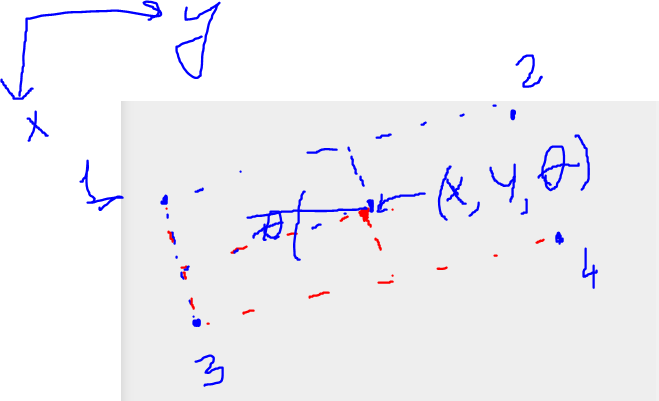

#### 1) Ищем все прямые
#### 2) Ищем точки их пересечения, где угол между прямыми --->90 (точка 1)
#### 3) Измеряем расстояния прямых (1-2, 3-4, 1-3, 2-4)
#### 4) Ищем средние точки
#### 5) Хватаем доску в центре

In [ ]:
import cv2
import numpy as np


img = cv2.imread('Realsenses.jpg')

img = img[:-200,130:-200,:]

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(7,7),1)
imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=4)


gray = np.float32(imgErode)
dst = cv2.cornerHarris(gray,5,3,0.04)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
for i in range(1, len(corners)):
    print(corners[i])
img[dst>0.1*dst.max()]=[0,0,255]
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows

In [ ]:
img = cv2.imread('Realsenses.jpg')

img = img[:-200,130:-200,:]

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows

In [ ]:
corners_help = corners

In [ ]:
corners_rewritten = []
for i in range(1, len(corners)):
    a = min(corners_help[:][0])
    

## Опыт1 01.06


In [ ]:
def getRectangles(img,minArea, maxArea):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > minArea and area < maxArea:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            #if objCor == 3: objectType = "Tri"
            
            if objCor == 4: #elif
                #aspRatio = w/float(h)
                #if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
                #else:
                objectType = "Rectangle"
            elif objCor > 4: objectType = "Round"
                
            else: 
                objectType="None"
                
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.line(imgContour,(int(x+w/2),int(y)),(int(x+w/2),y+h),(0,0,255),1) # Прицел вертикаль
            cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
            
            cv2.putText(imgContour,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

In [ ]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

img = cv2.imread("Boards.png") 
img = cv2.resize(img,(400,400))

def empty(a):
    pass



    

kernel = np.ones((3, 3), 'uint8')

# imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=1)




blur = 3
erode = 1
cannyx = 38
cannyy = 14


while True:
    # Convert the img to grayscale
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


    imgBlur = cv2.GaussianBlur(imgGray,(blur,blur),1)

    imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=erode)


    # Apply edge detection method on the image
    imgCanny = cv2.Canny(imgErode,cannyx,cannyy)

    imgDialation = cv2.dilate(imgCanny,kernel, iterations = 1)




    mask = np.zeros(imgCanny.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (120, 120), (290, 310), 255, -1)
    masked = cv2.bitwise_and(imgDialation, imgDialation, mask=mask)
    imgContour = img.copy()

    minArea=500
    maxArea=2000

    getRectangles(masked,minArea,maxArea)
    imgBlank = np.zeros_like(img)
    center = None


    cv2.imshow("img",img)
    cv2.waitKey(1)
    cv2.imshow("imgGray",imgGray)
    cv2.waitKey(1)
    cv2.imshow("imgErode",imgErode)
    cv2.waitKey(1)
    cv2.imshow("imgCanny",imgCanny)
    cv2.waitKey(1)
    cv2.imshow("imgDialation",imgDialation)
    cv2.waitKey(1)
    cv2.imshow("imgMasked",masked)
    cv2.waitKey(1)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)

    print('Blur =', blur, 'Erode =',erode, 'Canny X =',cannyx, 'Canny Y =',cannyy)
    cv2.waitKey(1)
    clear_output(wait=True)




    #img = cv2.imread("Sample.png") #import an image
    #img = cv2.resize(img,(400,400))



## Опыт 2 02.06

In [1]:
def getRectangles(img,minArea, maxArea):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > minArea and area < maxArea:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            #if objCor == 3: objectType = "Tri"
            
            if objCor == 4: #elif
                #aspRatio = w/float(h)
                #if aspRatio > 0.95 and aspRatio < 1.05: objectType = "Square"
                #else:
                objectType = "Rectangle"
            elif objCor > 4: objectType = "Round"
                
            else: 
                objectType="None"
                
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.line(imgContour,(int(x+w/2),int(y)),(int(x+w/2),y+h),(0,0,255),1) # Прицел вертикаль
            cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
            
            cv2.putText(imgContour,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,125),2)
            

In [ ]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard

img = cv2.imread("Raznoboylowlight8.jpg") 
img = cv2.resize(img,(400,400))

def empty(a):
    pass



    

kernel = np.ones((3, 3), 'uint8')

# imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=1)





# imgBlank = np.zeros_like(img)

# img = cv2.resize(img,(320,400))
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",1260,480)

cv2.createTrackbar("Blur","TrackBars",1,50,empty)
cv2.createTrackbar("Erode","TrackBars",0,10,empty)
cv2.createTrackbar("Canny X","TrackBars",0,250,empty)
cv2.createTrackbar("Canny Y","TrackBars",0,250,empty)
cv2.createTrackbar("A","TrackBars",0,1500,empty)
cv2.createTrackbar("B","TrackBars",0,1500,empty)
cv2.createTrackbar("C","TrackBars",0,1500,empty)
cv2.createTrackbar("D","TrackBars",0,1500,empty)
cv2.createTrackbar("Minimum Area","TrackBars",0,5000,empty)
cv2.createTrackbar("Maximum Area","TrackBars",0,5000,empty)

while True:
       
    blur = cv2.getTrackbarPos("Blur", "TrackBars")
    if blur%2 == 1:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")
    else:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")-1
    erode = cv2.getTrackbarPos("Erode", "TrackBars")
    cannyx = cv2.getTrackbarPos("Canny X", "TrackBars")
    cannyy = cv2.getTrackbarPos("Canny Y", "TrackBars")
    A = cv2.getTrackbarPos("A", "TrackBars")
    B = cv2.getTrackbarPos("B", "TrackBars")
    C = cv2.getTrackbarPos("C", "TrackBars")
    D = cv2.getTrackbarPos("D", "TrackBars")
    minArea = cv2.getTrackbarPos("Minimum Area", "TrackBars")
    maxArea = cv2.getTrackbarPos("Maximum Area", "TrackBars")
    

    # Convert the img to grayscale
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    imgBlur = cv2.GaussianBlur(imgGray,(blur,blur),1)

    imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=erode)

    # Apply edge detection method on the image
    imgCanny = cv2.Canny(imgErode,cannyx,cannyy)

    imgDialation = cv2.dilate(imgCanny,kernel, iterations = 1)




    mask = np.zeros(imgCanny.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (A, B), (C, D), 255, -1)
#     cv2.rectangle(mask, (120, 120), (290, 310), 255, -1)
    masked = cv2.bitwise_and(imgDialation, imgDialation, mask=mask)
    imgContour = img.copy()
    getRectangles(masked, minArea, maxArea)
    imgBlank = np.zeros_like(img)
    center = None


    cv2.imshow("img",img)
    cv2.waitKey(1)
    cv2.imshow("imgGray",imgGray)
    cv2.waitKey(1)
    cv2.imshow("imgErode",imgErode)
    cv2.waitKey(1)
    cv2.imshow("imgCanny",imgCanny)
    cv2.waitKey(1)
    cv2.imshow("imgDialation",imgDialation)
    cv2.waitKey(1)
    cv2.imshow("imgMasked",masked)
    cv2.waitKey(1)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)

    print('Blur =', blur, 'Erode =',erode, 'Canny X =',cannyx, 'Canny Y =',cannyy)
    cv2.waitKey(1)
    clear_output(wait=True)



#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))


        
        
        
#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))



Blur = -1 Erode = -1 Canny X = -1 Canny Y = -1


## Опыт 3 Операция над контрастом


## Video Rectangles changed

In [1]:
def getRectangles(img,minArea, maxArea):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > minArea and area < maxArea:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            
            #if objCor == 3: objectType = "Tri"
            
            if objCor == 4: 
                
                aspRatio = w/float(h)
                if aspRatio > 0.95 and aspRatio < 1.05: 
                    objectType = "Square"             
                else:
                    objectType = "Rectangle"
#             elif objCor > 4: objectType = "Round"
                
            else: 
                objectType="None"
                
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.line(imgContour,(int(x+w/2),int(y)),(int(x+w/2),y+h),(0,0,255),1) # Прицел вертикаль
            cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
            
            cv2.putText(imgContour,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.2,(0,255,125),2)
            

In [ ]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard



webcam = cv2.VideoCapture(1) #import webcam
webcam.set(3,640) #dimensions
webcam.set(4,480) #dimensions 
webcam.set(10,100)#brightness



# img = cv2.imread("Boards4.png") 
# img = cv2.resize(img,(400,400))

def empty(a):
    pass



    

kernel = np.ones((3, 3), 'uint8')

# imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=1)





# imgBlank = np.zeros_like(img)

# img = cv2.resize(img,(320,400))
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",1260,480)

cv2.createTrackbar("Blur","TrackBars",1,30,empty)
cv2.createTrackbar("Erode","TrackBars",0,10,empty)
cv2.createTrackbar("Canny X","TrackBars",0,200,empty)
cv2.createTrackbar("Canny Y","TrackBars",0,200,empty)
cv2.createTrackbar("A","TrackBars",0,1500,empty)
cv2.createTrackbar("B","TrackBars",0,1500,empty)
cv2.createTrackbar("C","TrackBars",0,1500,empty)
cv2.createTrackbar("D","TrackBars",0,1500,empty)
cv2.createTrackbar("Minimum Area","TrackBars",0,50000,empty)
cv2.createTrackbar("Maximum Area","TrackBars",0,50000,empty)

while True:
    
    blur = cv2.getTrackbarPos("Blur", "TrackBars")
    if blur%2 == 1:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")
    else:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")-1
    erode = cv2.getTrackbarPos("Erode", "TrackBars")
    cannyx = cv2.getTrackbarPos("Canny X", "TrackBars")
    cannyy = cv2.getTrackbarPos("Canny Y", "TrackBars")
    A = cv2.getTrackbarPos("A", "TrackBars")
    B = cv2.getTrackbarPos("B", "TrackBars")
    C = cv2.getTrackbarPos("C", "TrackBars")
    D = cv2.getTrackbarPos("D", "TrackBars")
    minArea = cv2.getTrackbarPos("Minimum Area", "TrackBars")
    maxArea = cv2.getTrackbarPos("Maximum Area", "TrackBars")
    
    success, img = webcam.read()

    # Convert the img to grayscale
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    imgBlur = cv2.GaussianBlur(imgGray,(blur,blur),1)

    imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=erode)

    # Apply edge detection method on the image
    imgCanny = cv2.Canny(imgErode,cannyx,cannyy)

    imgDialation = cv2.dilate(imgCanny,kernel, iterations = 1)




    mask = np.zeros(imgCanny.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (A, B), (C, D), 255, -1)
#     cv2.rectangle(mask, (120, 120), (290, 310), 255, -1)
    masked = cv2.bitwise_and(imgDialation, imgDialation, mask=mask)
    imgContour = img.copy()
    getRectangles(masked, minArea, maxArea)
    imgBlank = np.zeros_like(img)
    center = None


    cv2.imshow("img",img)
    cv2.waitKey(1)
    cv2.imshow("imgGray",imgGray)
    cv2.waitKey(1)
    cv2.imshow("imgErode",imgErode)
    cv2.waitKey(1)
    cv2.imshow("imgCanny",imgCanny)
    cv2.waitKey(1)
    cv2.imshow("imgDialation",imgDialation)
    cv2.waitKey(1)
    cv2.imshow("imgMasked",masked)
    cv2.waitKey(1)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)

    print('Blur =', blur, 'Erode =',erode, 'Canny X =',cannyx, 'Canny Y =',cannyy)
    cv2.waitKey(1)
    clear_output(wait=True)



#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))


        
        
        
#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))



5
2
Blur = 3 Erode = 0 Canny X = 28 Canny Y = 67


# Dataset collecting

In [34]:
## Сохранение картинок

import cv2
import time
from playsound import playsound


# Opens the inbuilt camera of laptop to capture video.
cap = cv2.VideoCapture(0)
i = 0
  
while(cap.isOpened()):
    ret, frame = cap.read()
      
    # This condition prevents from infinte looping 
    # incase video ends.
    if ret == False:
        break
      
    # Save Frame by Frame into disk using imwrite method
    cv2.imwrite('exp1'+str(i)+'.jpg', frame)
    cv2.imshow("frame", frame)
    cv2.waitKey(1)
    
    i += 1
    
    playsound('screenshot.mp3')
  
    time.sleep(4)
  
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Дефишинг

In [35]:
from defisheye import Defisheye

dtype = 'linear'
format = 'fullframe'
fov = 100
pfov = 90

img = "./exp10.jpg"
img_out = f"./exp10_{dtype}_{format}_{pfov}_{fov}.jpg"

obj = Defisheye(img, dtype=dtype, format=format, fov=fov, pfov=pfov)
obj.convert(img_out)

array([[[ 33,  33,  33],
        [ 28,  28,  28],
        [ 26,  26,  26],
        ...,
        [ 86,  86,  86],
        [ 88,  88,  88],
        [ 96,  96,  96]],

       [[ 38,  38,  38],
        [ 24,  24,  24],
        [ 28,  28,  28],
        ...,
        [ 92,  92,  92],
        [ 81,  81,  81],
        [ 92,  92,  92]],

       [[ 37,  37,  37],
        [ 38,  38,  38],
        [ 24,  24,  24],
        ...,
        [ 81,  81,  81],
        [ 84,  84,  84],
        [ 78,  78,  78]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [241, 241, 241],
        [238, 238, 238],
        [237, 237, 237]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 230, 230],
        [236, 236, 236],
        [236, 236, 236]],

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [231, 231, 231],
        [225, 225, 225],
        [223, 223, 223]]

# Скрипт для различия типов досок

In [1]:
def getRectangles(img,minArea, maxArea):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    cor = contours[1]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        #print(area)
        
        if area > minArea and area < maxArea:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.04*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            
            print(cnt)
            
#             cnts = cv2.findContours(imgThresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = cor[0] if len(cor) == 2 else cor[1]
            c = max(cnts, key=cv2.contourArea)
          
            
            left = tuple(c[c[:, :, 0].argmin()][0])
            right = tuple(c[c[:, :, 0].argmax()][0])
            top = tuple(c[c[:, :, 1].argmin()][0])
            bottom = tuple(c[c[:, :, 1].argmax()][0])

            
            
            #if objCor == 3: objectType = "Tri"
            
            if objCor == 4: 
                
                aspRatio = w/float(h)
                if aspRatio > 0.95 and aspRatio < 1.05: 
                    objectType = "Square"             
                else:
                    objectType = "Rectangle"
#             elif objCor > 4: objectType = "Round"
                
            else: 
                objectType="None"
                
#             cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)
#             cv2.line(imgContour,(int(x+w/2),int(y)),(int(x+w/2),y+h),(0,0,255),1) # Прицел вертикаль
#             cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
        
    
            print('left = ',left)
#             print(right)
            
#             cv2.line(imgContour,((left[0]),(right[0])),(0,0,255),1) # Прицел вертикаль
#             cv2.line(imgContour,(int(x),int(y+h/2)),(int(x+w),int(y+h/2)),(0,0,255),1) # Прицел горизонталь
        
            cv2.line(imgContour,(left[0],left[1]),(right[0],right[1]),(0,0,255),1) # Прицел горизонталь
            
            
            cv2.putText(imgContour,objectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.2,(0,255,125),2)
            
#             print(cnt)

In [2]:
import cv2
import numpy as np
from IPython.display import clear_output
import keyboard





img = cv2.imread("exp10_linear_fullframe_90_100.jpg") 
img = cv2.resize(img,(400,400))

def empty(a):
    pass



    

kernel = np.ones((3, 3), 'uint8')

# imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=1)





# imgBlank = np.zeros_like(img)

# img = cv2.resize(img,(320,400))
cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars",1260,480)

cv2.createTrackbar("Blur","TrackBars",1,30,empty)
cv2.createTrackbar("Erode","TrackBars",0,10,empty)
cv2.createTrackbar("Canny X","TrackBars",0,200,empty)
cv2.createTrackbar("Canny Y","TrackBars",0,200,empty)
cv2.createTrackbar("A","TrackBars",0,1500,empty)
cv2.createTrackbar("B","TrackBars",0,1500,empty)
cv2.createTrackbar("C","TrackBars",0,1500,empty)
cv2.createTrackbar("D","TrackBars",0,1500,empty)
cv2.createTrackbar("Minimum Area","TrackBars",0,50000,empty)
cv2.createTrackbar("Maximum Area","TrackBars",0,50000,empty)

while True:
    
    blur = cv2.getTrackbarPos("Blur", "TrackBars")
    if blur%2 == 1:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")
    else:
        blur = cv2.getTrackbarPos("Blur", "TrackBars")-1
    erode = cv2.getTrackbarPos("Erode", "TrackBars")
    cannyx = cv2.getTrackbarPos("Canny X", "TrackBars")
    cannyy = cv2.getTrackbarPos("Canny Y", "TrackBars")
#     A = cv2.getTrackbarPos("A", "TrackBars")
#     B = cv2.getTrackbarPos("B", "TrackBars")

    A = 500
    B = 500

    C = cv2.getTrackbarPos("C", "TrackBars")
    D = cv2.getTrackbarPos("D", "TrackBars")
    minArea = cv2.getTrackbarPos("Minimum Area", "TrackBars")
    maxArea = cv2.getTrackbarPos("Maximum Area", "TrackBars")
    
    
    
#     success, img = webcam.read()

    # Convert the img to grayscale
    imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    imgBlur = cv2.GaussianBlur(imgGray,(blur,blur),1)

    imgErode = cv2.erode(imgBlur, kernel, cv2.BORDER_REFLECT, iterations=erode)

    # Apply edge detection method on the image
    imgCanny = cv2.Canny(imgErode,cannyx,cannyy)

    imgDialation = cv2.dilate(imgCanny,kernel, iterations = 1)
    
    
    imgThresh = cv2.threshold(imgDialation, 220, 255, cv2.THRESH_BINARY_INV)[1]




    mask = np.zeros(imgCanny.shape[:2], dtype="uint8")
    cv2.rectangle(mask, (A, B), (C, D), 255, -1)
#     cv2.rectangle(mask, (120, 120), (290, 310), 255, -1)
    masked = cv2.bitwise_and(imgDialation, imgDialation, mask=mask)
    imgContour = img.copy()
    getRectangles(masked, minArea, maxArea)
    imgBlank = np.zeros_like(img)
    center = None


#     cv2.imshow("img",img)
#     cv2.waitKey(1)
#     cv2.imshow("imgGray",imgGray)
#     cv2.waitKey(1)
#     cv2.imshow("imgErode",imgErode)
#     cv2.waitKey(1)
#     cv2.imshow("imgCanny",imgCanny)
#     cv2.waitKey(1)
    cv2.imshow("imgDialation",imgDialation)
    cv2.waitKey(1)
    cv2.imshow("imgMasked",masked)
    cv2.waitKey(1)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)
    cv2.imshow("imgContour",imgContour)
    cv2.waitKey(1)
    cv2.imshow("imgThresh",imgThresh)
    cv2.waitKey(1)
    
    
    print('Blur =', blur, 'Erode =',erode, 'Canny X =',cannyx, 'Canny Y =',cannyy)
    cv2.waitKey(1)
    clear_output(wait=True)



#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))


        
        
        
#img = cv2.imread("Sample.png") #import an image
#img = cv2.resize(img,(400,400))



4
[[[383 397]]

 [[384 396]]

 [[385 397]]

 [[384 398]]]


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\shapedescr.cpp:315: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::contourArea'


In [5]:
cnt

NameError: name 'cnt' is not defined

In [3]:
a = [[[206 110]]

 [[207 109]]

 [[217 109]]

 [[218 110]]

 [[229 110]]

 [[230 111]]

 [[241 111]]

 [[242 112]]

 [[251 112]]

 [[252 113]]

 [[262 113]]

 [[263 114]]

 [[271 114]]

 [[272 115]]

 [[280 115]]

 [[281 116]]

 [[292 116]]

 [[293 117]]

 [[300 117]]

 [[301 118]]

 [[311 118]]

 [[312 119]]

 [[318 119]]

 [[319 120]]

 [[328 120]]

 [[329 121]]

 [[330 121]]

 [[331 122]]

 [[331 135]]

 [[330 136]]

 [[330 138]]

 [[331 139]]

 [[330 140]]

 [[330 156]]

 [[329 157]]

 [[329 171]]

 [[328 172]]

 [[328 178]]

 [[329 179]]

 [[328 180]]

 [[328 187]]

 [[327 188]]

 [[327 202]]

 [[326 203]]

 [[326 213]]

 [[325 214]]

 [[325 227]]

 [[324 228]]

 [[324 230]]

 [[322 232]]

 [[320 232]]

 [[319 231]]

 [[305 231]]

 [[304 230]]

 [[290 230]]

 [[289 229]]

 [[277 229]]

 [[276 228]]

 [[259 228]]

 [[258 227]]

 [[249 227]]

 [[248 226]]

 [[235 226]]

 [[234 225]]

 [[219 225]]

 [[218 224]]

 [[206 224]]

 [[205 223]]

 [[202 223]]

 [[201 222]]

 [[201 220]]

 [[200 220]]

 [[199 219]]

 [[199 210]]

 [[200 209]]

 [[200 193]]

 [[201 192]]

 [[201 180]]

 [[202 179]]

 [[202 167]]

 [[203 166]]

 [[203 151]]

 [[204 150]]

 [[204 131]]

 [[205 130]]

 [[205 114]]

 [[206 113]]]

SyntaxError: invalid syntax (<ipython-input-3-c3e83a55eaeb>, line 1)